# Deep Learning

## Libraries

In [1]:
# main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# keras, classes
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

## Deep Learning

### Importing, Splitting and Scaling

In [2]:
bank = pd.read_csv("../data/bank_processed_data.csv", index_col=0)
bank.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_encoded,Income_Category_encoded,Card_Category_encoded,x0_Married,x0_Single,x0_Unknown,x1_Existing Customer,x2_M
0,45,3,39,5,1,3,12691.0,777,1.335,1144,...,1.625,0.061,2.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,5,44,6,1,2,8256.0,864,1.541,1291,...,3.714,0.105,4.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,51,3,36,4,1,0,3418.0,0,2.594,1887,...,2.333,0.000,4.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0
3,40,4,34,3,4,1,3313.0,2517,1.405,1171,...,2.333,0.760,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,40,3,21,5,1,0,4716.0,0,2.175,816,...,2.500,0.000,1.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0


In [3]:
# creating X and y variables

X = bank.drop(columns="x1_Existing Customer")
y = bank["x1_Existing Customer"]

# train_test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [4]:
# scaling the data

scaler = StandardScaler() #initialize the scaler

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Keras

In [10]:
def keras_predict(X_train, y_train, X_test):
    """
    Input: X_train, y_train, and X_test
    Output: y_pred
    """
    # Initializing ANN
    model = Sequential()

    # Adding the input layer and a hidden layer
    model.add(keras.Input(shape=(20,)))
    model.add(Dense(units=11, activation="relu"))

    # Adding the second hidden layer
    model.add(Dense(units=11, activation="relu"))

    # Adding the output layer
    model.add(Dense(units=1, activation="sigmoid"))
    
    # Compiling the ANN
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    
    # Fitting ANN to training set
    early_stop = EarlyStopping(monitor="loss", mode="min", verbose=1, patience=10)

    hist = model.fit(X_train, y_train, epochs=500, verbose=0, callbacks=early_stop)
    
    # getting the y_pred
    y_pred = model.predict(X_test)
    
    return y_pred, hist

In [11]:
y_pred, hist = keras_predict(X_train_scaled, y_train, X_test_scaled)

Epoch 00482: early stopping


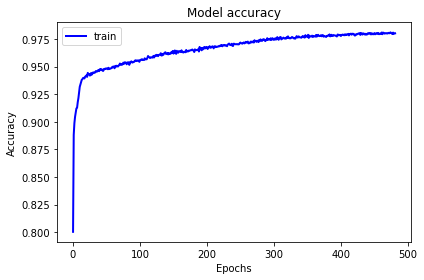

In [12]:
plt.plot(hist.history['accuracy'], lw=2.0, color='b', label='train')
plt.title("Model accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig("../images/ANN_model_accuracy.png")
plt.show()

In [13]:
y_pred[:10]

array([[1.2364686e-03],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999720e-01],
       [1.0000000e+00],
       [9.9997896e-01],
       [9.9999958e-01],
       [9.9989641e-01],
       [9.9999619e-01],
       [5.0457958e-05]], dtype=float32)

In [14]:
# Converting the numbers to True/False
y_pred = (y_pred > 0.5)

y_pred[:10]

array([[False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False]])

In [15]:
# creating confussion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[145,  18],
       [ 22, 828]], dtype=int64)

In [16]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]

print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")

True Positives: 828
True Negatives: 145
False Positives: 22
False Negatives: 18


In [17]:
# Accuracy, precission, recall and F1 Score

#accuracy
accuracy = (TP + TN)/(TP + TN + FN + FP)
print(f"Accuracy: {round(accuracy,4)}")

#precision
precision = TP / (TP + FP)
print(f"Precision: {round(precision,4)}")

#recall
recall = TP / (TP + FN)
print(f"Recall: {round(recall,4)}")

#F1 Score
f1_score = 2 * ((precision * recall) / (precision + recall))
print(f"F1 Score: {round(f1_score,4)}")

Accuracy: 0.9605
Precision: 0.9741
Recall: 0.9787
F1 Score: 0.9764


### Plots

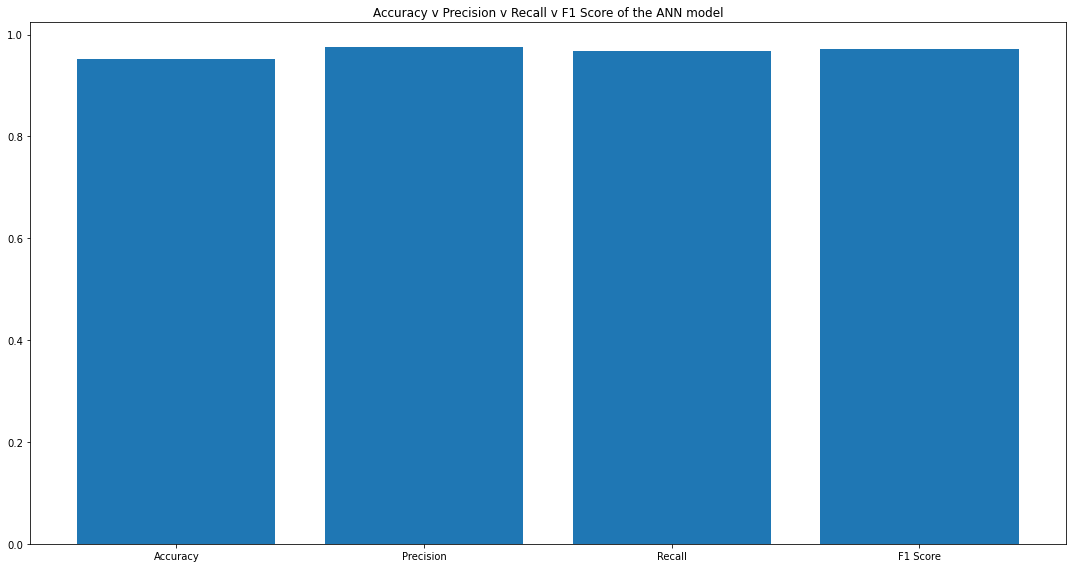

In [74]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

Eval_Metrics = [accuracy, precision, recall, f1_score]
Metric_Names = ["Accuracy", "Precision", "Recall", "F1 Score"]
Metric_Values = [0.9516, 0.9753, 0.9673, 0.9713]

Metrics_pos = np.arange(len(Metric_Names))
plt.bar(Metrics_pos, Eval_Metrics)
plt.xticks(Metrics_pos, Metric_Names)
plt.title("Accuracy v Precision v Recall v F1 Score of the ANN model")

# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=14)

plt.tight_layout()
plt.savefig("../images/ANN_model_results.png")
plt.show()